# Resumen de los datos: dimensiones y estructuras

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Importamos dataset:

In [3]:
dataset = pd.read_csv("winequality.csv", sep=";")

In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white


In [5]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,7.4,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white
6493,6.2,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white
6494,6.9,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white
6495,7.0,0.24,0.36,4.9,0.083,10.0,133.0,0.99420,3.33,0.37,10.8,6,white
6496,7.1,0.34,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,5,red


In [6]:
dataset.shape

(6497, 13)

Resumen de los estadísticos básicos para las columnas numéricas, así sabremos cómo se distribuyen los datos:

In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

# Vamos a buscar si hay duplicados, en cuyo caso vamos a quitarlos del dataset: 

In [9]:
dataset.duplicated().sum()

1177

In [10]:
dataset.loc[dataset.duplicated(),:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
264,6.6,0.200,0.27,10.9,0.038,29.0,130.0,0.99496,3.11,0.44,10.5,7,white
324,5.2,0.155,0.33,1.6,0.028,13.0,59.0,0.98975,3.30,0.84,11.9,8,white
382,7.7,0.390,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7,white
392,7.2,0.310,0.35,7.2,0.046,45.0,178.0,0.99550,3.14,0.53,9.7,5,white
415,6.8,0.220,0.35,17.5,0.039,38.0,153.0,0.99940,3.24,0.42,9.0,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,6.7,0.410,0.34,9.2,0.049,29.0,150.0,0.99680,3.22,0.51,9.1,5,white
6488,6.9,0.150,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8,white
6489,6.0,0.290,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.2,6,white
6491,6.8,0.270,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white


In [11]:
dataset=dataset.drop_duplicates(keep='first')


In [12]:
dataset.shape

(5320, 13)

# Primer método de clasificación: kNN

División de las variables en X e y:

In [13]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 12].values

In [14]:
X = X.astype(int)

In [15]:
X.dtype

dtype('int64')

# Tratamiento de la variable "y" como categórica:
La pasaremos a variable dummy

In [16]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_no_train, y_train, y_no_train = train_test_split(X, y, train_size= 0.75, random_state=0)

X_test, X_cv, y_test, y_cv = train_test_split(X_no_train, y_no_train, train_size = 0.5, random_state=0)

In [18]:
len(X_train)

3990

In [19]:
len(X_test)

665

In [20]:
len(X_cv)

665

# Escalado de variables:
Procedemos a escalar las variables de X, no escalamos las variables de y porque son categóricas y no queremos perder la noción de pertenencia a vino blanco o rojo.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
X_cv = scaler_X.transform(X_cv)

# Ajustar un primer modelo:

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
clasificador = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
clasificador.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Ahora usaremos nuestro modelo para compararlo con el conjunto de validación, y ajustar los posibles parámetros del conjunto de entrenamiento antes de presentarlo al conjunto de test, que será el paso final:
Hacemos la predicción con el conjunto de validación:

In [24]:
y_pred_cv = clasificador.predict(X_cv)

Generamos la matriz de confusión entre las predicciones del conjunto de entrenamiento y el de validación:

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_cv,y_pred_cv)

array([[143,  20],
       [ 12, 490]])

Seguidamente evaluamos el accuracy de train y validación para detectar posibles under u overfitting, y hacemos gráfica de como se comporta el modelo según el tamaño de la muestra que le pasamos:

In [26]:
print(clasificador.score(X_train, y_train))
print(clasificador.score(X_cv, y_cv))

0.962907268170426
0.9518796992481203


Evaluamos métricas sobre el conjunto de validación:

In [28]:
print("\t\t\tAccuracy:\tPrecision:\tRecall:\t F1:")
print("-- resultados val kNN :\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t {:.2f}".format(accuracy_score(y_cv, y_pred_cv),
                                                                       precision_score(y_cv, y_pred_cv),
                                                                       recall_score(y_cv, y_pred_cv),
                                                                       f1_score(y_cv, y_pred_cv)))

			Accuracy:	Precision:	Recall:	 F1:
-- resultados val kNN :	0.95		0.96		0.98	 0.97


# Vamos a ir un paso mas allá y vamos a buscar los mejores parámetros para nuestro modelo y generar curvas de aprendizaje:

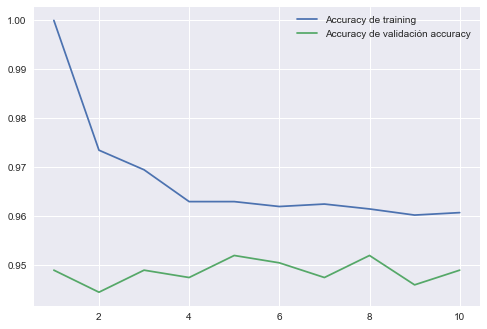

In [30]:
import matplotlib.pyplot as plt

training_accuracy = []
cv_accuracy = []
# Probamos neighbors de 1 a 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Creamos el modelo
    clasificador = KNeighborsClassifier(n_neighbors=n_neighbors)
    clasificador.fit(X_train, y_train)
    
   # Guardamos accuracy de train
    training_accuracy.append(clasificador.score(X_train, y_train))
   # Guardamos accuracy de validación
    cv_accuracy.append(clasificador.score(X_cv, y_cv))
    
plt.plot(neighbors_settings, training_accuracy, label="Accuracy de training")
plt.plot(neighbors_settings, cv_accuracy, label="Accuracy de validación accuracy")
plt.legend()

Usamos grid search para ver cuál es realmente el mejor parámetro:

In [36]:
best_score = 0
for n_neighbors in [1, 3, 5, 7, 9]:
    
    # Entrenamos el modelo
    clasificador = KNeighborsClassifier(n_neighbors=n_neighbors)
    clasificador.fit(X_train, y_train)
    # Evaluamos en conjunto de validación
    score = clasificador.score(X_cv, y_cv)
    # Guardamos score si obtenemos uno mejor:
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': n_neighbors}

print("best score: ", best_score)
print("best parameters: ", best_parameters)

best score:  0.9518796992481203
best parameters:  {'n_neighbors': 5}


Finalmente usando 5 neighbors generamos las curvas de aprendizaje:

/Users/victor/opt/anaconda3/envs/MASTER/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


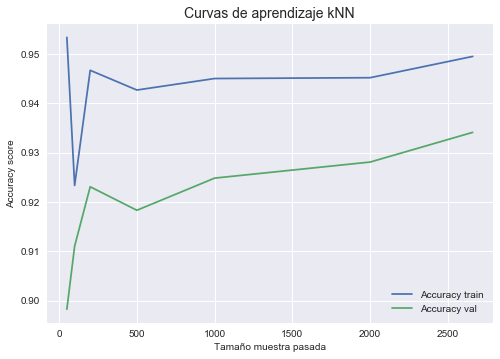

In [55]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2), X_train, y_train, 
    train_sizes=[50, 100, 200,500,1000,2000,2659], scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Accuracy train')
plt.plot(train_sizes, val_scores_mean, label = 'Accuracy val')

plt.title('Curvas de aprendizaje kNN', fontsize=14)
plt.ylabel('Accuracy score', fontsize=10)
plt.xlabel('Tamaño muestra pasada', fontsize=10)
plt.legend(loc='best')
plt.show()

Finalmente entrenamos el modelo con los parámetros obtenidos y lo evaluamos:

In [56]:
clasificador = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
clasificador.fit(X_train, y_train)
y_pred_test = clasificador.predict(X_test)

In [57]:
confusion_matrix(y_test, y_pred_test)

array([[155,  16],
       [ 15, 479]])

In [58]:
print("\t\t\tAccuracy:\tPrecision:\tRecall:\t F1:")

print("-- resultados test kNN:\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t {:.2f}".format(accuracy_score(y_test, y_pred_test),
                                                                       precision_score(y_test, y_pred_test),
                                                                       recall_score(y_test, y_pred_test),
                                                                       f1_score(y_test, y_pred_test)))

			Accuracy:	Precision:	Recall:	 F1:
-- resultados test kNN:	0.95		0.97		0.97	 0.97


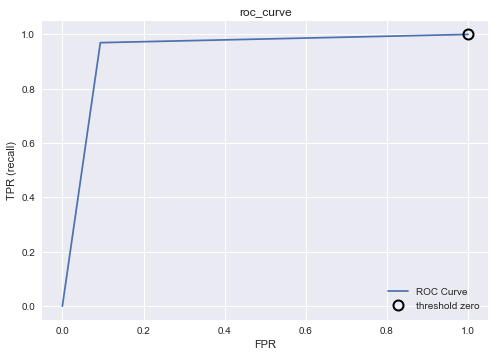

In [59]:
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label="ROC Curve") 
plt.xlabel("FPR")
plt.ylabel("TPR (recall)") 
plt.title("roc_curve");
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds)) 
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
            label="threshold zero", fillstyle="none", c='k', mew=2) 
plt.legend(loc=4)

# Clasificación usando Random Forest

Seguidamente vamos a hacer el ejercicio de clasificación usando también el algoritmo Random forest, que es una combinación del algoritmo de árboles de decisión. 
Comentar que en este caso no será necesario escalar las variables, ya que no es un algoritmo basado en distancias

In [62]:
dataset = pd.read_csv("winequality.csv", sep=";")

In [63]:
dataset=dataset.drop_duplicates(keep='first')

In [64]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 12].values

In [65]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_no_train, y_train, y_no_train = train_test_split(X, y, train_size= 0.75, random_state=0)

X_test, X_cv, y_test, y_cv = train_test_split(X_no_train, y_no_train, train_size = 0.5, random_state=0)

In [67]:
from sklearn.ensemble import RandomForestClassifier
clasificador = RandomForestClassifier(n_estimators = 10, criterion="entropy", random_state=0)
clasificador.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
y_pred_val = clasificador.predict(X_cv)

In [69]:
# Accuracy de train:
clasificador.score(X_train,y_train)

1.0

In [70]:
# Accuracy de validación:
clasificador.score(X_cv, y_cv)

0.98796992481203

Generamos la matriz de confusión para ver que tan bién ha clasificado, y también las diferentes métricas:

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_cv,y_pred_val)

array([[156,   7],
       [  1, 501]])

Calculamos también las métricas de evaluación:

In [72]:
print("\t\t\tAccuracy:  \tPrecision:  \tRecall:  \t F1:")

print("-- resultados test R.Forest:\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t {:.2f}".format(accuracy_score(y_cv, y_pred_val),
                                                                       precision_score(y_cv, y_pred_val),
                                                                       recall_score(y_cv, y_pred_val),
                                                                       f1_score(y_cv, y_pred_val)))

			Accuracy:  	Precision:  	Recall:  	 F1:
-- resultados test R.Forest:	0.99		0.99		1.00	 0.99


Como hicimos con kNN, vamos a probar diferentes "estimators":

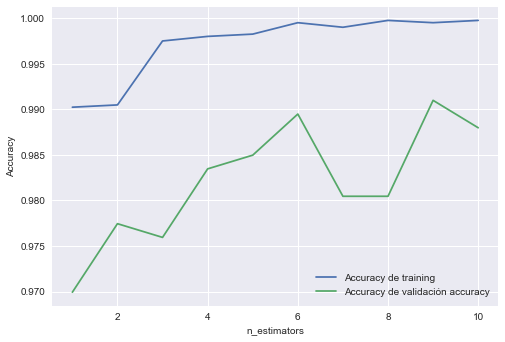

In [52]:
training_accuracy = []
cv_accuracy = []
# Probamos valores de 1 a 10:
estimators_settings = range(1, 11)

for n_estimators in estimators_settings:
    # Creamos el modelo:
    clasificador = RandomForestClassifier(n_estimators=n_estimators)
    clasificador.fit(X_train, y_train)
    #Guardamos accuracy del set de train
    training_accuracy.append(clasificador.score(X_train, y_train))
    #Guardamos accurary de validación
    cv_accuracy.append(clasificador.score(X_cv, y_cv))
plt.plot(neighbors_settings, training_accuracy, label="Accuracy de training")
plt.plot(neighbors_settings, cv_accuracy, label="Accuracy de validación accuracy")
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('n_estimators', fontsize=10)
plt.legend()

Vamos también a calcularlo:

In [53]:
best_score = 0
for n_estimators in [1, 2, 4, 6, 8, 10]:
    
   
    clasificador = RandomForestClassifier(n_estimators=n_estimators)
    clasificador.fit(X_train, y_train)
   
    score = clasificador.score(X_cv, y_cv)
    
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': n_neighbors}

print("best score: ", best_score)
print("best parameters: ", best_parameters)

best score:  0.9909774436090225
best parameters:  {'n_neighbors': 9}


Generamos curvas de aprendizaje usando el resultado anterior:

/Users/victor/opt/anaconda3/envs/MASTER/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


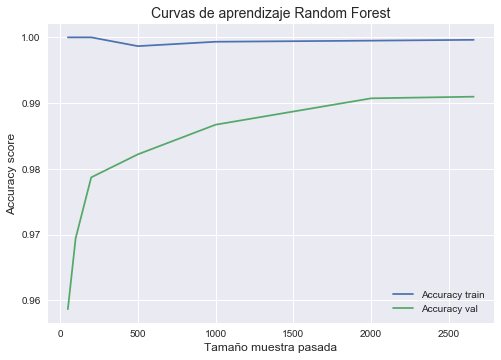

In [54]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(n_estimators = 9, criterion="entropy", random_state=0), X_train, y_train, 
    train_sizes=[50, 100, 200,500,1000,2000,2659], scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Accuracy train')
plt.plot(train_sizes, val_scores_mean, label = 'Accuracy val')

plt.title('Curvas de aprendizaje Random Forest', fontsize=14)
plt.ylabel('Accuracy score', fontsize=12)
plt.xlabel('Tamaño muestra pasada', fontsize=12)
plt.legend(loc='best')
plt.show()

Entrenamos modelo final y calculamos métricas:

In [74]:
clasificador = RandomForestClassifier(n_estimators = 9, criterion="entropy", random_state=0)
clasificador.fit(X_train, y_train)
y_pred_test = clasificador.predict(X_test)

In [75]:
confusion_matrix(y_test, y_pred_test)

array([[169,   2],
       [  2, 492]])

In [76]:
print("\t\t\tAccuracy\tPrecision\tRecall\t F1")
print("-- resultados test kNN:\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t {:.2f}".format(accuracy_score(y_test, y_pred_test),
                                                                       precision_score(y_test, y_pred_test),
                                                                       recall_score(y_test, y_pred_test),
                                                                       f1_score(y_test, y_pred_test)))

			Accuracy	Precision	Recall	 F1
-- resultados test kNN:	0.99		1.00		1.00	 1.00


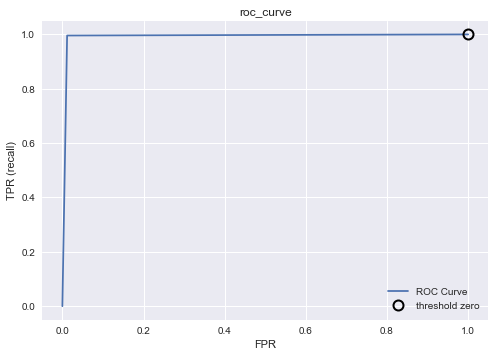

In [78]:
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label="ROC Curve") 
plt.xlabel("FPR")
plt.ylabel("TPR (recall)") 
plt.title("roc_curve");
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds)) 
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
            label="threshold zero", fillstyle="none", c='k', mew=2) 
plt.legend(loc=4)

# Cross validation

Voy a probar ahora a usar los mismos algoritmos pero usando cross validation, con el método de los pipelines, porque en el caso de knn quiero normalizar el dataset, anteriormente usé el StandardScaler.

Además añado el grid search, que básicamente se basa en probar todas las posibles combinaciones de los parámetros de interés del algoritmo para encontrar el que mejor se ajuste.

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
dataset = pd.read_csv("winequality.csv", sep=";")

In [81]:
dataset=dataset.drop_duplicates(keep='first')

In [82]:
dataset.shape

(5320, 13)

In [83]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 12].values

In [84]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [85]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict

In [86]:
from sklearn.ensemble import RandomForestClassifier

best_score=0

for n_estimators in [1, 2, 4, 6, 8, 10]:  
    # for each combination of parameters
    # train a RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=n_estimators)
    # perform cross-validation
    scores = cross_val_score(clf, X, y, cv=5) 
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    # if we got a better score, store the score and parameters 
    if score > best_score:
        best_score = score
        best_parameters = {'n_estimators': n_estimators}
# rebuild a model on the combined training and validation set 
clf = RandomForestClassifier(**best_parameters)
clf.fit(X, y)
print("best score: ", best_score)
print("best parameters: ", best_parameters)

print('Cross-validation scores ({}-fold): {}'.format(n_estimators,scores))
print('Mean cross-validation score ({}-fold): {:.3f}'.format(n_estimators,score))

best score:  0.9913546166171991
best parameters:  {'n_estimators': 10}
Cross-validation scores (10-fold): [0.98685446 0.9943609  0.9906015  0.99154135 0.99341486]
Mean cross-validation score (10-fold): 0.991


In [87]:
y_pred = cross_val_predict(clf, X, y, cv=10)

In [88]:
print("\t\t\tAccuracy\tPrecision\tRecall\t F1")
print("-- resultados test kNN:\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t {:.2f}".format(accuracy_score(y, y_pred),
                                                                       precision_score(y, y_pred),
                                                                       recall_score(y, y_pred),
                                                                       f1_score(y, y_pred)))

			Accuracy	Precision	Recall	 F1
-- resultados test kNN:	0.99		0.99		0.99	 0.99


# Regresión usando función de Ridge

Primeramente importamos el datatset, eliminamos duplicados y dividimos en conjunto X e y:

In [91]:
import pandas as pd

dataset = pd.read_csv("winequality.csv", sep=";")

In [92]:
dataset=dataset.drop_duplicates(keep='first')

In [93]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white


In [94]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12]].values
y = dataset.iloc[:, 1].values

Transformamos la variable categórica color del vino en dummy:

In [95]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:,11] = labelencoder_X.fit_transform(X[:, 11])

In [96]:
X[:,11]

array([0, 1, 1, ..., 1, 1, 1], dtype=object)

Dividimos en conjunto de train, validación y test:

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_no_train, y_train, y_no_train = train_test_split(X, y, train_size= 0.75, random_state=0)

X_test, X_cv, y_test, y_cv = train_test_split(X_no_train, y_no_train, train_size = 0.5, random_state=0)

Hacemos el escalado de las variables:

In [98]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train) 
# sólo hacemos el fit en X_train, para X_cv y X_test mantenemos el mismo fit, y solo hacemos el transform
X_cv = scaler_X.transform(X_cv)
X_test = scaler_X.transform(X_test)

Importamos Ridge, entrenamos el modelo y calculamos métricas:

In [99]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [100]:
y_pred_cv = ridge.predict(X_cv)

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print("val set mae: %f" % mean_absolute_error(y_cv, y_pred_cv))
print("val set mse: %f" % mean_squared_error(y_cv, y_pred_cv))
print("val set mad: %f" % median_absolute_error(y_cv, y_pred_cv))
print("val set r cuadrado: %f" % r2_score(y_cv, y_pred_cv))

val set mae: 0.000046
val set mse: 0.000000
val set mad: 0.000036
val set r cuadrado: 1.000000


Vamos a probar ahora diferentes valores para el parámetro alpha:

In [101]:
from sklearn.linear_model import Ridge
best_score = 0
for alpha in [1.0,2.0,4.0,6.0,8.0,10.0]:
    # for each combination of parameters
    # train the Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # evaluate the SVC on the test set
    score = ridge.score(X_test, y_test)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'Alpha': alpha,}
print("best score: ", best_score)
print("best parameters: ", best_parameters)

best score:  0.9999998589772822
best parameters:  {'Alpha': 1.0}


Recreamos las curvas de aprendizaje con el alpha=1.0:

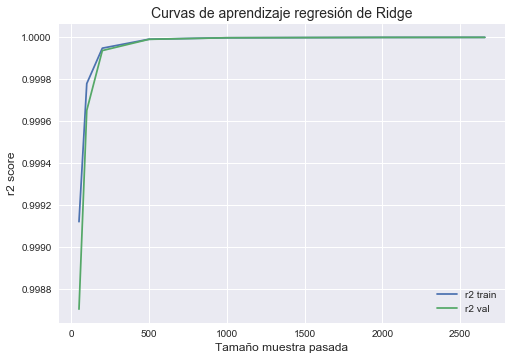

In [102]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    Ridge(alpha=1.0), X_train, y_train, 
    train_sizes=[50, 100, 200,500,1000,2000,2659], scoring='r2', cv=5)
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'r2 train')
plt.plot(train_sizes, val_scores_mean, label = 'r2 val')

plt.title('Curvas de aprendizaje regresión de Ridge', fontsize=14)
plt.ylabel('r2 score', fontsize=12)
plt.xlabel('Tamaño muestra pasada', fontsize=12)
plt.legend(loc='best')
plt.show()

Entrenamos el modelo final y calculamos métricas:

In [103]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred_test = ridge.predict(X_test)

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print("training set mae: %f" % mean_absolute_error(y_test, y_pred_test))
print("training set mse: %f" % mean_squared_error(y_test, y_pred_test))
print("training set mad: %f" % median_absolute_error(y_test, y_pred_test))
print("training set r cuadrado: %f" % r2_score(y_test, y_pred_test))

training set mae: 0.000044
training set mse: 0.000000
training set mad: 0.000035
training set r cuadrado: 1.000000


Graficamos la predicción:

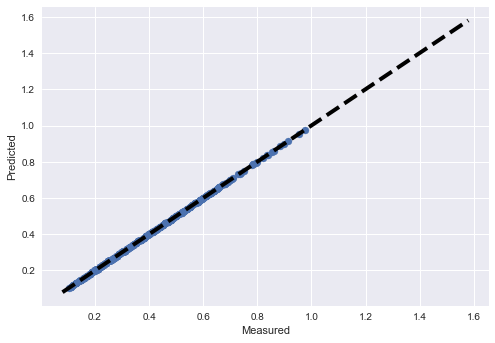

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Segundo algoritmo: Regresión usando SVM

In [106]:
import pandas as pd

dataset = pd.read_csv("winequality.csv", sep=";")

In [107]:
dataset=dataset.drop_duplicates(keep='first')

In [108]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12]].values
y = dataset.iloc[:, 1].values

In [109]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:,11] = labelencoder_X.fit_transform(X[:, 11])

Dividimos en train, val y test:

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_no_train, y_train, y_no_train = train_test_split(X, y, train_size= 0.75, random_state=0)

X_test, X_cv, y_test, y_cv = train_test_split(X_no_train, y_no_train, train_size = 0.5, random_state=0)

Escalamos las variables X:

In [112]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train) 
X_cv = scaler_X.transform(X_cv)
X_test = scaler_X.transform(X_test)

Probamos un modelo simple y buscamos el score en el set de validación:

In [113]:
from sklearn.svm import SVR
regression = SVR(kernel = "rbf", C=10)
regression.fit(X_train, y_train)
regression.score(X_train, y_train)

0.9252393177067454

In [114]:
y_pred_cv = regression.predict(X_cv)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print("val set mae: %f" % mean_absolute_error(y_cv, y_pred_cv))
print("val set mse: %f" % mean_squared_error(y_cv, y_pred_cv))
print("val set mad: %f" % median_absolute_error(y_cv, y_pred_cv))
print("val set r cuadrado: %f" % r2_score(y_cv, y_pred_cv))

val set mae: 0.040130
val set mse: 0.002727
val set mad: 0.035749
val set r cuadrado: 0.900440


Vamos a usar gridsearch ahora para encontrar los mejores parámetros de nuestro modelo, en este caso C y gamma:

In [116]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVR(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_cv, y_cv)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("best score: ", best_score)
print("best parameters: ", best_parameters)

best score:  0.9195605037513103
best parameters:  {'C': 1, 'gamma': 0.01}


Hacemos curvas de aprendizaje usando los parametros obtenidos:

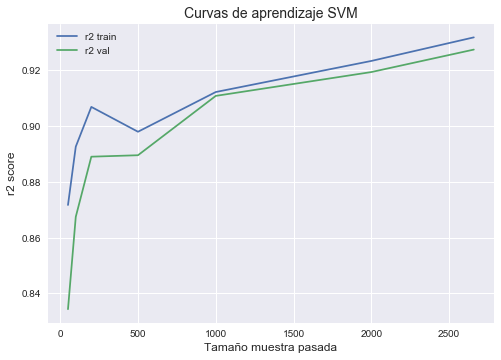

In [117]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    SVR(kernel = "rbf", C=1, gamma=0.01), X_train, y_train, 
    train_sizes=[50, 100, 200,500,1000,2000,2659], scoring='r2', cv=5)
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'r2 train')
plt.plot(train_sizes, val_scores_mean, label = 'r2 val')

plt.title('Curvas de aprendizaje SVM', fontsize=14)
plt.ylabel('r2 score', fontsize=12)
plt.xlabel('Tamaño muestra pasada', fontsize=12)
plt.legend(loc='best')
plt.show()

Vemos que si que ciertamente el r2 mejora en este caso pasándole los parámetros obtenidos, y sigue mejorando a medida que aumentamos el tamaño de la muestra:

Por último rehacemos el modelo y probamos la predicción sobre el conjunto de test:

In [118]:
regression = SVR(kernel = "rbf", C=1, gamma=0.01)
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

0.9298934372706222

In [119]:
y_pred_test = regression.predict(X_test)

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print("test set mae: %f" % mean_absolute_error(y_test, y_pred_test))
print("test set mse: %f" % mean_squared_error(y_test, y_pred_test))
print("test set mad: %f" % median_absolute_error(y_test, y_pred_test))
print("test set r cuadrado: %f" % r2_score(y_test, y_pred_test))

test set mae: 0.035828
test set mse: 0.001774
test set mad: 0.034450
test set r cuadrado: 0.929893


Ciertamente el modelo en su r2 no mejora mucho más que con el set de validación y C=10

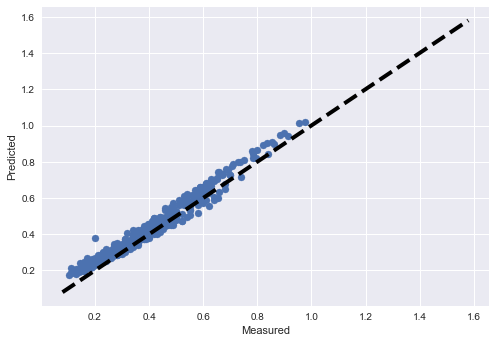

In [121]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()